In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\LENOVO\Ardent ML\Social_Network_Ads.csv')


In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix:",confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

My Confusion Matrix: [[65  3]
 [ 7 25]]
0.9


In [8]:
#new customer prediction age=28 saalry=119000
k=classifier.predict(sc.transform([[28,119000]]))
print("New customer class:",k)


New customer class: [0]


In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

In [10]:
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(),stop = X_set[:, 1].max(), step = 0.01)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


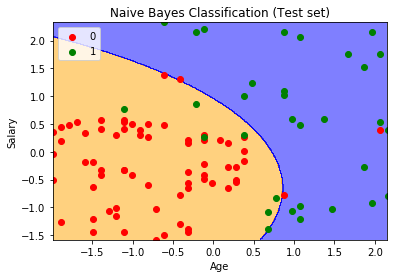

In [12]:
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i),
                label = j)
plt.title('Naive Bayes Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()